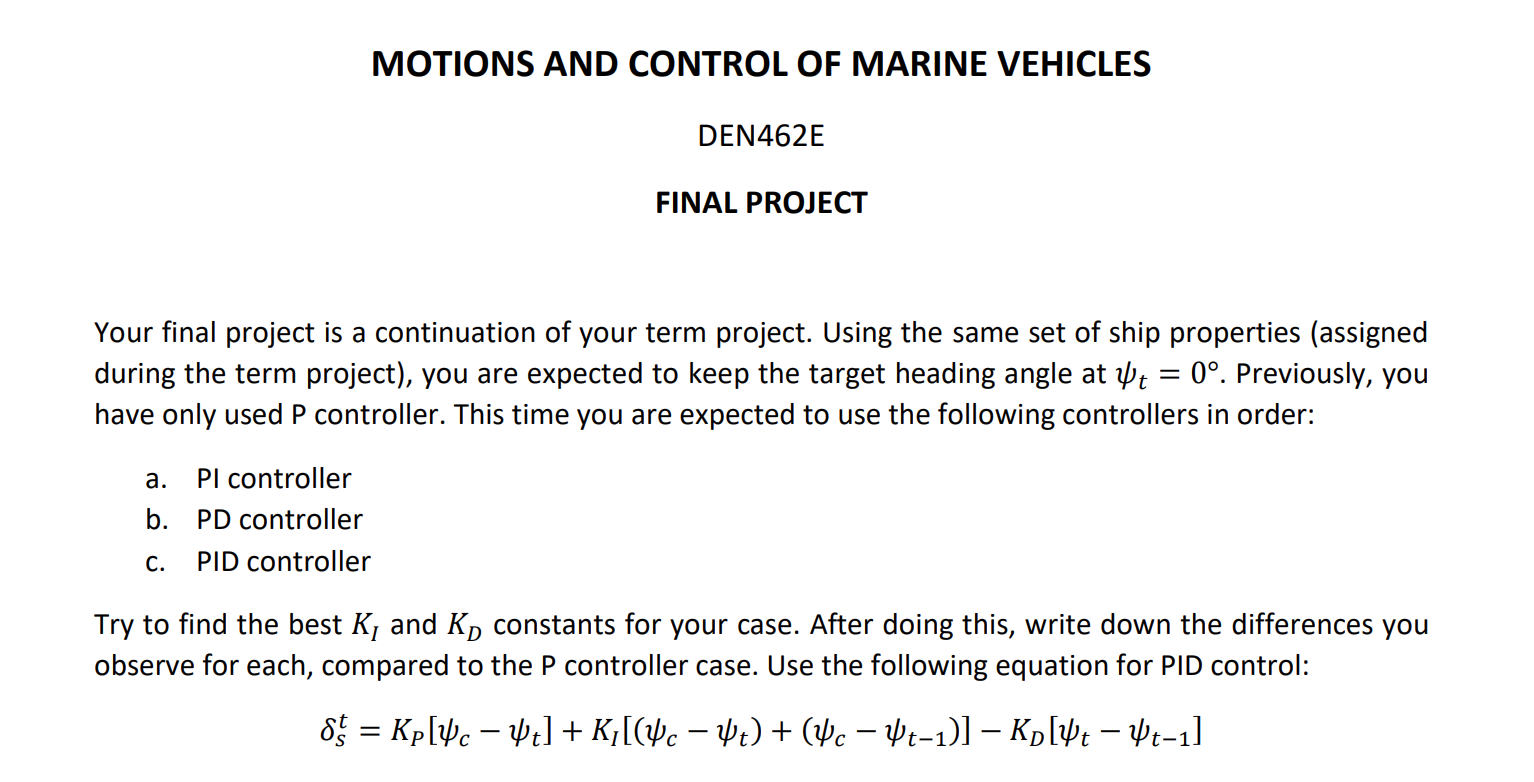

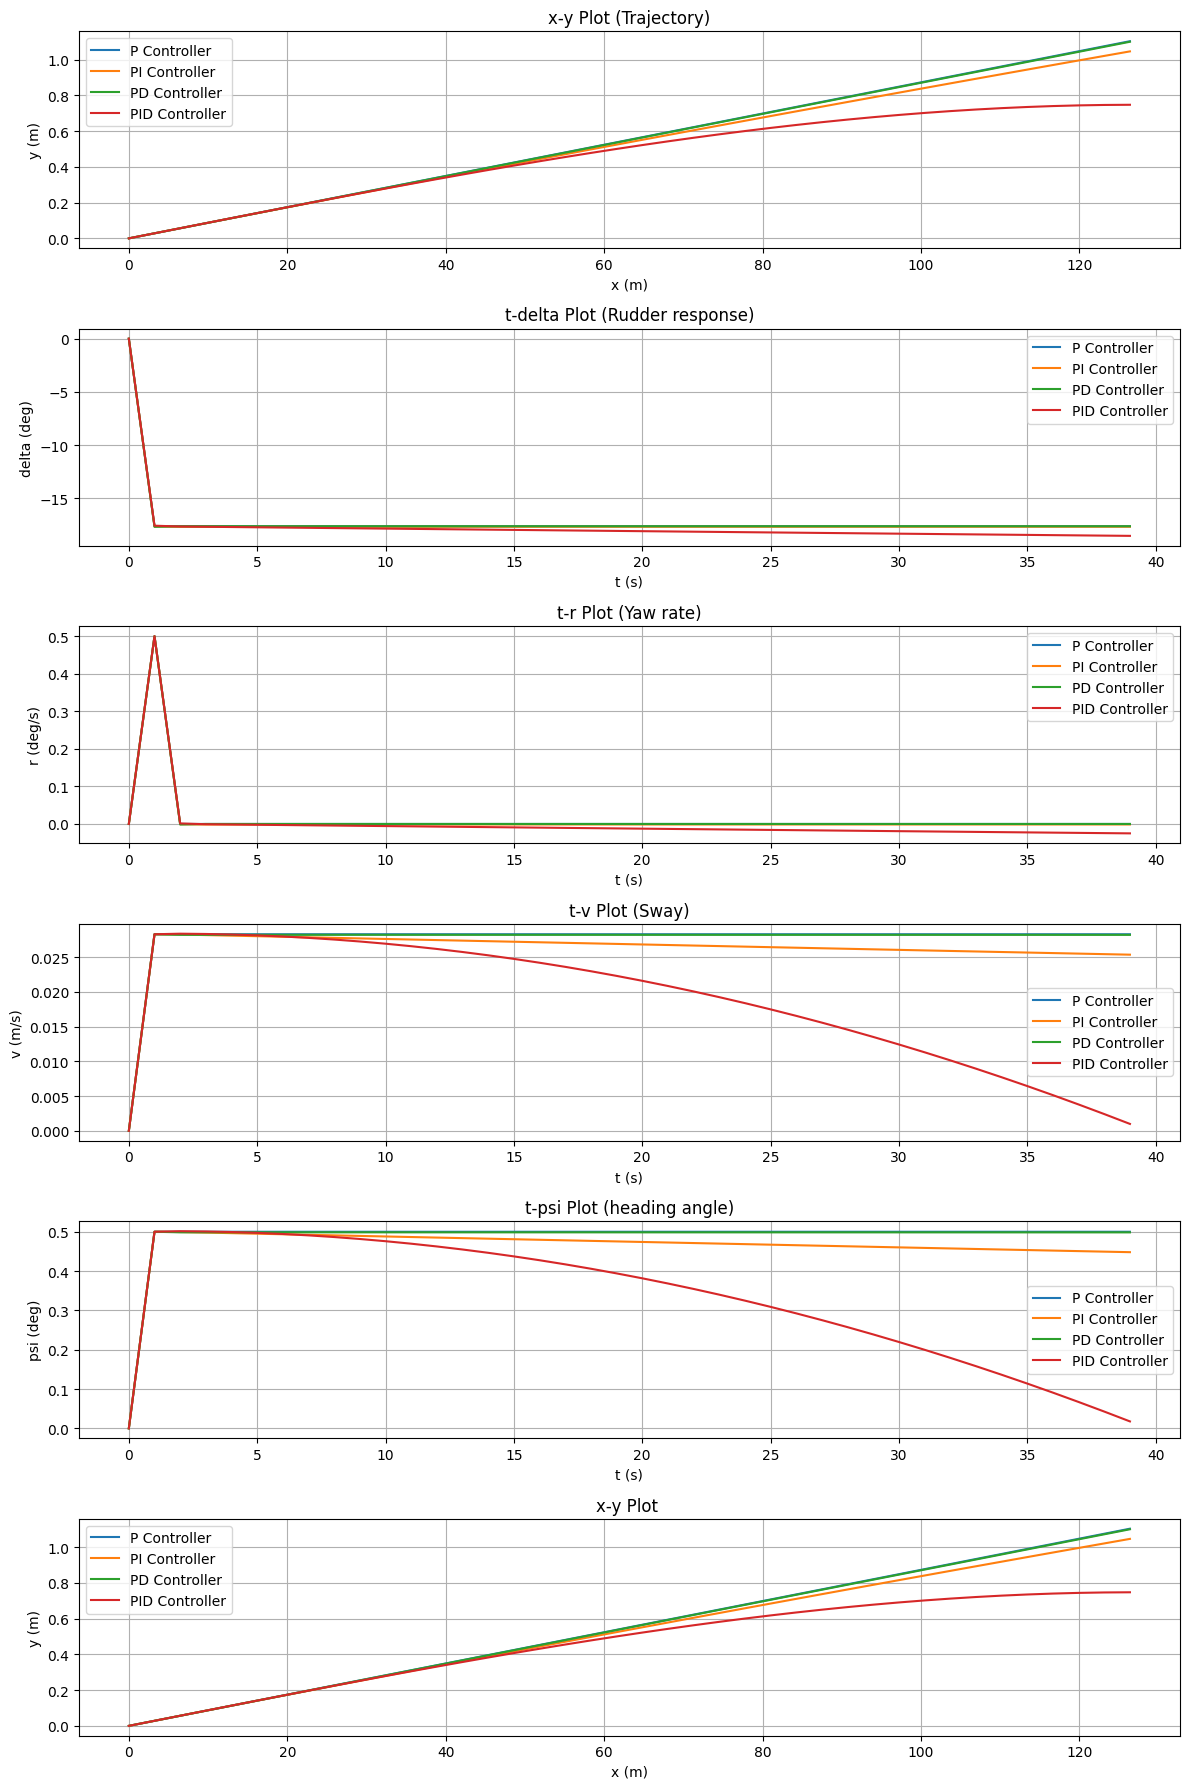

In [ ]:
import pandas as pd
import numpy as np
from math import cos, sin, pi
import matplotlib.pyplot as plt

#################↓ Coef #####################################
K = 0.028389  # 1/s
K0 = 0.5  # deg/s
u_std = 3.24072  # m/s
psi_target = 0  # deg
KP = 1/K  # Proportional gain

# PI Controller Constants
KI = 0.05  # Integral gain

# PD Controller Constants
KD = 0.1  # Derivative gain

# PID Controller Constants
# You can tweak the gains KP, KI, and KD to optimize the control response

##################################################################

# Write a time value
t = 39

df = pd.DataFrame(index=range(t + 1), columns=['t', 'r', 'psi', 'delta', 'u', 'v', 'x', 'y'])

df.loc[0] = [0, 0, 0, 0, u_std, 0, 0, 0]

# P Controller
for i in range(1, t + 1):
    df.loc[i, 't'] = i
    df.loc[i, 'r'] = K * df.loc[i - 1, 'delta'] + K0
    df.loc[i, 'psi'] = df.loc[i - 1, 'psi'] + df.loc[i, 'r'] * (df.loc[i, 't'] - df.loc[i - 1, 't'])
    df.loc[i, 'delta'] = KP * (psi_target - df.loc[i, 'psi'])
    df.loc[i, 'u'] = u_std * cos(df.loc[i, 'psi'] * pi / 180)
    df.loc[i, 'v'] = u_std * sin(df.loc[i, 'psi'] * pi / 180)
    df.loc[i, 'x'] = df.loc[i - 1, 'x'] + df.loc[i, 'u'] * (df.loc[i, 't'] - df.loc[i - 1, 't'])
    df.loc[i, 'y'] = df.loc[i - 1, 'y'] + df.loc[i, 'v'] * (df.loc[i, 't'] - df.loc[i - 1, 't'])

# PI Controller
df_pi = df.copy()
error_integral = 0  # Initialize the integral error
for i in range(1, t + 1):
    df_pi.loc[i, 'delta'] = KP * (psi_target - df_pi.loc[i, 'psi']) + KI * (
                psi_target - df_pi.loc[i, 'psi'] + psi_target - df_pi.loc[i - 1, 'psi'])
    df_pi.loc[i, 'r'] = K * df_pi.loc[i - 1, 'delta'] + K0
    df_pi.loc[i, 'psi'] = df_pi.loc[i - 1, 'psi'] + df_pi.loc[i, 'r'] * (df_pi.loc[i, 't'] - df_pi.loc[i - 1, 't'])
    df_pi.loc[i, 'u'] = u_std * cos(df_pi.loc[i, 'psi'] * pi / 180)
    df_pi.loc[i, 'v'] = u_std * sin(df_pi.loc[i, 'psi'] * pi / 180)
    df_pi.loc[i, 'x'] = df_pi.loc[i - 1, 'x'] + df_pi.loc[i, 'u'] * (df_pi.loc[i, 't'] - df_pi.loc[i - 1, 't'])
    df_pi.loc[i, 'y'] = df_pi.loc[i - 1, 'y'] + df_pi.loc[i, 'v'] * (df_pi.loc[i, 't'] - df_pi.loc[i - 1, 't'])

# PD Controller
df_pd = df.copy()
for i in range(1, t + 1):
    df_pd.loc[i, 'delta'] = KP * (psi_target - df_pd.loc[i, 'psi']) - KD * (
                df_pd.loc[i, 'psi'] - df_pd.loc[i - 1, 'psi'])
    df_pd.loc[i, 'r'] = K * df_pd.loc[i - 1, 'delta'] + K0
    df_pd.loc[i, 'psi'] = df_pd.loc[i - 1, 'psi'] + df_pd.loc[i, 'r'] * (df_pd.loc[i, 't'] - df_pd.loc[i - 1, 't'])
    df_pd.loc[i, 'u'] = u_std * cos(df_pd.loc[i, 'psi'] * pi / 180)
    df_pd.loc[i, 'v'] = u_std * sin(df_pd.loc[i, 'psi'] * pi / 180)
    df_pd.loc[i, 'x'] = df_pd.loc[i - 1, 'x'] + df_pd.loc[i, 'u'] * (df_pd.loc[i, 't'] - df_pd.loc[i - 1, 't'])
    df_pd.loc[i, 'y'] = df_pd.loc[i - 1, 'y'] + df_pd.loc[i, 'v'] * (df_pd.loc[i, 't'] - df_pd.loc[i - 1, 't'])

# PID Controller
df_pid = df.copy()
for i in range(1, t + 1):
    error = psi_target - df_pid.loc[i, 'psi']
    delta_error = error - (df_pid.loc[i, 'psi'] - df_pid.loc[i - 1, 'psi'])
    error_integral += error
    df_pid.loc[i, 'delta'] = KP * error + KI * (error + error_integral) - KD * delta_error
    df_pid.loc[i, 'r'] = K * df_pid.loc[i - 1, 'delta'] + K0
    df_pid.loc[i, 'psi'] = df_pid.loc[i - 1, 'psi'] + df_pid.loc[i, 'r'] * (df_pid.loc[i, 't'] - df_pid.loc[i - 1, 't'])
    df_pid.loc[i, 'u'] = u_std * cos(df_pid.loc[i, 'psi'] * pi / 180)
    df_pid.loc[i, 'v'] = u_std * sin(df_pid.loc[i, 'psi'] * pi / 180)
    df_pid.loc[i, 'x'] = df_pid.loc[i - 1, 'x'] + df_pid.loc[i, 'u'] * (df_pid.loc[i, 't'] - df_pid.loc[i - 1, 't'])
    df_pid.loc[i, 'y'] = df_pid.loc[i - 1, 'y'] + df_pid.loc[i, 'v'] * (df_pid.loc[i, 't'] - df_pid.loc[i - 1, 't'])

#print("P Controller:")
#print(df)
#print("PI Controller:")
#print(df_pi)
#print("PD Controller:")
#print(df_pd)
#print("PID Controller:")
#print(df_pid)

fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Plot x and y
axs[0].plot(df['x'], df['y'], label='P Controller')
axs[0].plot(df_pi['x'], df_pi['y'], label='PI Controller')
axs[0].plot(df_pd['x'], df_pd['y'], label='PD Controller')
axs[0].plot(df_pid['x'], df_pid['y'], label='PID Controller')
axs[0].set_xlabel('x (m)')
axs[0].set_ylabel('y (m)')
axs[0].set_title('x-y Plot (Trajectory)')
axs[0].grid(True)
axs[0].legend()

# Plot t and delta
axs[1].plot(df['t'], df['delta'], label='P Controller')
axs[1].plot(df_pi['t'], df_pi['delta'], label='PI Controller')
axs[1].plot(df_pd['t'], df_pd['delta'], label='PD Controller')
axs[1].plot(df_pid['t'], df_pid['delta'], label='PID Controller')
axs[1].set_xlabel('t (s)')
axs[1].set_ylabel('delta (deg)')
axs[1].set_title('t-delta Plot (Rudder response)')
axs[1].grid(True)
axs[1].legend()

# Plot t and r
axs[2].plot(df['t'], df['r'], label='P Controller')
axs[2].plot(df_pi['t'], df_pi['r'], label='PI Controller')
axs[2].plot(df_pd['t'], df_pd['r'], label='PD Controller')
axs[2].plot(df_pid['t'], df_pid['r'], label='PID Controller')
axs[2].set_xlabel('t (s)')
axs[2].set_ylabel('r (deg/s)')
axs[2].set_title('t-r Plot (Yaw rate)')
axs[2].grid(True)
axs[2].legend()

# Plot t and v
axs[3].plot(df['t'], df['v'], label='P Controller')
axs[3].plot(df_pi['t'], df_pi['v'], label='PI Controller')
axs[3].plot(df_pd['t'], df_pd['v'], label='PD Controller')
axs[3].plot(df_pid['t'], df_pid['v'], label='PID Controller')
axs[3].set_xlabel('t (s)')
axs[3].set_ylabel('v (m/s)')
axs[3].set_title('t-v Plot (Sway)')
axs[3].grid(True)
axs[3].legend()

# Plot t and psi
axs[4].plot(df['t'], df['psi'], label='P Controller')
axs[4].plot(df_pi['t'], df_pi['psi'], label='PI Controller')
axs[4].plot(df_pd['t'], df_pd['psi'], label='PD Controller')
axs[4].plot(df_pid['t'], df_pid['psi'], label='PID Controller')
axs[4].set_xlabel('t (s)')
axs[4].set_ylabel('psi (deg)')
axs[4].set_title('t-psi Plot (heading angle)')
axs[4].grid(True)
axs[4].legend()

# Plot x and y 
axs[5].plot(df['x'], df['y'], label='P Controller')
axs[5].plot(df_pi['x'], df_pi['y'], label='PI Controller')
axs[5].plot(df_pd['x'], df_pd['y'], label='PD Controller')
axs[5].plot(df_pid['x'], df_pid['y'], label='PID Controller')
axs[5].set_xlabel('x (m)')
axs[5].set_ylabel('y (m)')
axs[5].set_title('x-y Plot ')
axs[5].grid(True)
axs[5].legend()
#axs[5].set_xlim([-2, 2])
#axs[5].set_ylim([-2, 2])

plt.tight_layout()
plt.show()


In [ ]:
df

,t,r,psi,delta,u,v,x,y
0,0,0,0,0,3.24072,0,0,0
1,1,0.5,0.5,-17.612456,3.240597,0.02828,3.240597,0.02828
2,2,0.0,0.5,-17.612456,3.240597,0.02828,6.481193,0.056561
3,3,0.0,0.5,-17.612456,3.240597,0.02828,9.72179,0.084841
4,4,0.0,0.5,-17.612456,3.240597,0.02828,12.962386,0.113121
5,5,0.0,0.5,-17.612456,3.240597,0.02828,16.202983,0.141401
6,6,0.0,0.5,-17.612456,3.240597,0.02828,19.44358,0.169682
7,7,0.0,0.5,-17.612456,3.240597,0.02828,22.684176,0.197962
8,8,0.0,0.5,-17.612456,3.240597,0.02828,25.924773,0.226242
9,9,0.0,0.5,-17.612456,3.240597,0.02828,29.165369,0.254522


In [ ]:
df_pi

,t,r,psi,delta,u,v,x,y
0,0,0,0,0,3.24072,0,0,0
1,1,0.5,0.5,-17.637456,3.240597,0.02828,3.240597,0.02828
2,2,-0.00071,0.49929,-17.662456,3.240597,0.02824,6.481194,0.05652
3,3,-0.001419,0.497871,-17.66242,3.240598,0.02816,9.721791,0.08468
4,4,-0.001418,0.496452,-17.662349,3.240598,0.02808,12.96239,0.11276
5,5,-0.001416,0.495036,-17.662278,3.240599,0.027999,16.202989,0.140759
6,6,-0.001414,0.493622,-17.662207,3.2406,0.027919,19.443588,0.168679
7,7,-0.001412,0.492209,-17.662137,3.2406,0.02784,22.684189,0.196518
8,8,-0.00141,0.490799,-17.662066,3.240601,0.02776,25.92479,0.224278
9,9,-0.001408,0.48939,-17.661995,3.240602,0.02768,29.165392,0.251958


In [ ]:
df_pd

,t,r,psi,delta,u,v,x,y
0,0,0,0,0,3.24072,0,0,0
1,1,0.5,0.5,-17.662456,3.240597,0.02828,3.240597,0.02828
2,2,-0.001419,0.498581,-17.612456,3.240597,0.0282,6.481194,0.05648
3,3,0.0,0.498581,-17.612597,3.240597,0.0282,9.721791,0.08468
4,4,-0.000004,0.498577,-17.612597,3.240597,0.0282,12.962389,0.11288
5,5,-0.000004,0.498572,-17.612598,3.240597,0.0282,16.202986,0.141079
6,6,-0.000004,0.498568,-17.612598,3.240597,0.028199,19.443583,0.169279
7,7,-0.000004,0.498564,-17.612599,3.240597,0.028199,22.68418,0.197478
8,8,-0.000004,0.49856,-17.612599,3.240597,0.028199,25.924778,0.225677
9,9,-0.000004,0.498556,-17.612599,3.240597,0.028199,29.165375,0.253875


In [ ]:
df_pid

,t,r,psi,delta,u,v,x,y
0,0,0,0,0,3.24072,0,0,0
1,1,0.5,0.5,-17.562456,3.240597,0.02828,3.240597,0.02828
2,2,0.001419,0.501419,-17.637456,3.240596,0.028361,6.481193,0.056641
3,3,-0.00071,0.50071,-17.662597,3.240596,0.02832,9.721789,0.084961
4,4,-0.001423,0.499286,-17.687527,3.240597,0.02824,12.962386,0.113201
5,5,-0.002131,0.497155,-17.712384,3.240598,0.028119,16.202984,0.14132
6,6,-0.002837,0.494318,-17.737171,3.240599,0.027959,19.443583,0.169279
7,7,-0.003541,0.490778,-17.761887,3.240601,0.027759,22.684184,0.197038
8,8,-0.004242,0.486535,-17.786533,3.240603,0.027519,25.924787,0.224557
9,9,-0.004942,0.481594,-17.811109,3.240606,0.027239,29.165393,0.251796
